### 7) ROC와 AUC

In [1]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/concrete.csv")
df.head()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
0,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09,0
1,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,0
2,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,0
3,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34,0
4,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,0


In [2]:
train_cols = [ 'cement', 'flag', 'ash', 'water', 'superplastic', 'coarseagg', 'findagg', 'age']
print(train_cols)

X = df[train_cols]
y = df["class"]

['cement', 'flag', 'ash', 'water', 'superplastic', 'coarseagg', 'findagg', 'age']


In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])

df2=pd.concat([X_samp,y_samp],axis=1)
df2["class"].value_counts()

class
0    507
1    507
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,   test_size=0.2, stratify=y, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train, y_train)

print("학습용:",model1.score(X_train, y_train))
print("검증용:",model1.score(X_test, y_test))

학습용: 0.8543689320388349
검증용: 0.8106796116504854


In [6]:
#판별함수: 음수이면 0, 양수이면 1로 판별함, 0이 판별기준이 됨
model1.decision_function(X_test[:5])

array([-3.91525645, -0.81820747, -4.1047279 , -0.22906842,  1.21657118])

In [7]:
model1.predict(X_test[:5]) # 판별함수값이 0보다 작으면 0, 0보다 크면 1로 분류

array([0, 0, 0, 0, 1], dtype=int64)

In [8]:
from sklearn.svm import SVC

model2 = SVC(random_state=0)
model2.fit(X_train, y_train)

print("학습용:",model2.score(X_train, y_train))
print("검증용:",model2.score(X_test, y_test))

학습용: 0.7912621359223301
검증용: 0.7669902912621359


In [9]:
model2.decision_function(X_test[:5])

array([-1.41175307, -0.72593477, -1.26178529, -0.61577978,  0.49492823])

In [10]:
from sklearn.tree import DecisionTreeClassifier  

model3=DecisionTreeClassifier(random_state=0)  
model3.fit(X_train,y_train)  

print(model3.score(X_train,y_train))  
print(model3.score(X_test,y_test))

0.9975728155339806
0.9077669902912622


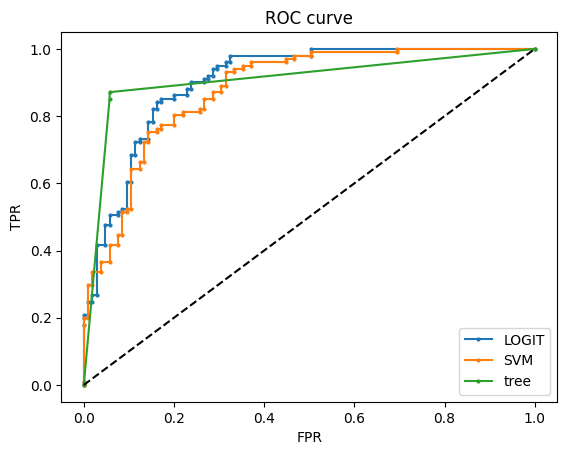

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

#TPR(True Positive Rate, 민감도) - 1을 1로 잘 맞춘 비율, y축
#FPR(False Positive Rate, 특이도) - 0을 1로 틀린 비율, x축

fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.decision_function(X_test))
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.decision_function(X_test))
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test)[:,1])

#면적(0.5~1.0)이 1에 가까울수록(좌측상단 꼭지점에 다가갈수록) 좋은 모형
plt.plot(fpr1, tpr1, 'o-', ms=2, label="LOGIT")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM")
plt.plot(fpr3, tpr3, 'o-', ms=2, label='tree')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

plt.show()
# 좌측상단 꼭지점에 가까울수록 더 좋은 모형

In [12]:
#AUC(Area Under the Curve) : ROC Curve의 면적
#1에 가까울수록 좋은 모형

from sklearn.metrics import auc  

auc(fpr1, tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3)

(0.9045733144743046, 0.8807166430928808, 0.9065063649222064)